In [1]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils

import numpy as np
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

from utils import set_seed
from model import GAN

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
seed = 42
set_seed(seed)

In [4]:
image_size = 64
batch_size = 256
dataloader = torch.utils.data.DataLoader(
    MNIST('./', train=True, download=True,
          transform=transforms.Compose([
                        transforms.Resize(image_size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5,)),
                     ])),
    batch_size=batch_size,
    shuffle=True, num_workers=1)

In [5]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
device

'cuda'

In [6]:
model = GAN(10, device, dataloader)

Epoch: 1 Generator loss: 3.9628090167537016 Discriminator loss: 0.3054208684950433


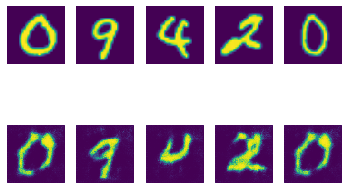

Epoch: 2 Generator loss: 3.6160028196395713 Discriminator loss: 0.24562080407396275


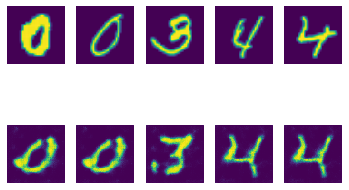

Epoch: 3 Generator loss: 3.97667892258218 Discriminator loss: 0.19561234297270472


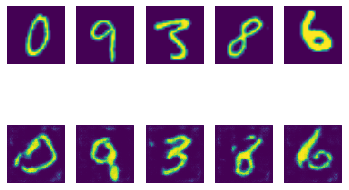

Epoch: 4 Generator loss: 4.1975252278307655 Discriminator loss: 0.16875664604471086


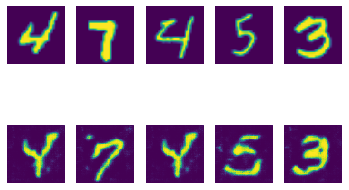

Epoch: 5 Generator loss: 4.303866436633658 Discriminator loss: 0.1497911586723429


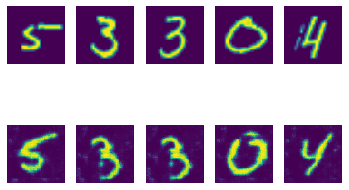

Epoch: 6 Generator loss: 4.4383970197210925 Discriminator loss: 0.13405100963217148


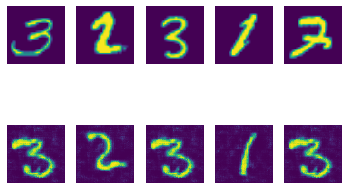

Epoch: 7 Generator loss: 4.488698124378286 Discriminator loss: 0.1141110804169736


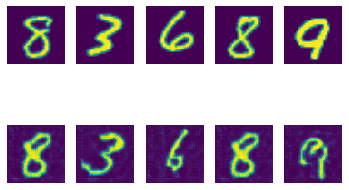

Epoch: 8 Generator loss: 4.7583437402197655 Discriminator loss: 0.11640542775709578


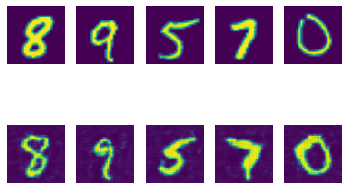

Epoch: 9 Generator loss: 4.705243105584002 Discriminator loss: 0.11675072367838088


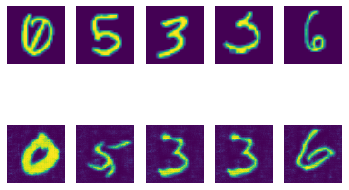

Epoch: 10 Generator loss: 4.761113479289603 Discriminator loss: 0.10608567562192045


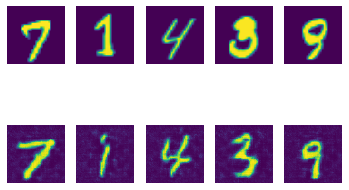

In [7]:
model.train()

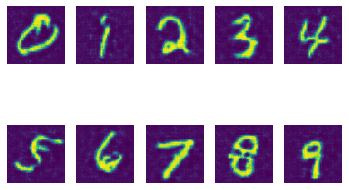

In [12]:
with torch.no_grad():
    fig, axes = plt.subplots(2, 5)
    z = torch.rand((10, model.emb_size)).to(model.device)
    labels = torch.arange(10)

    imgs_fake = model.gen([z, labels.to(model.device)]).detach().cpu()
    for i in range(10):
        axes[i // 5][i % 5].imshow(imgs_fake[i].view(64, 64))
        axes[i // 5][i % 5].axis('off')
    plt.show()